### Multiple Stocks ML & TA focused Price Target

In [1]:
from imports import *
import ta_functions as ta
import plotstock as ps

tickers = ['BABA', 'XPEV', 'NIO', 'DELL', 'NVDA', 'SHOP', 'COIN', 'TSLA', 'MU', 'BA', 'AMD',
          'CHPT', 'PYPL', 'NKE', 'GOOGL']
start_date = '2018-01-01'
ndays = 14

[*********************100%%**********************]  1 of 1 completed


BABA ...working on
Root Mean Squared Error: 3.837
R^2 Score: 0.996
Current price of BABA: 107.33
BABA is predicted as a ----  HODL / SIDELINES


C:\Users\Farrukh\jupyter-Notebooks\STOCKS\plotstock.py:161: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


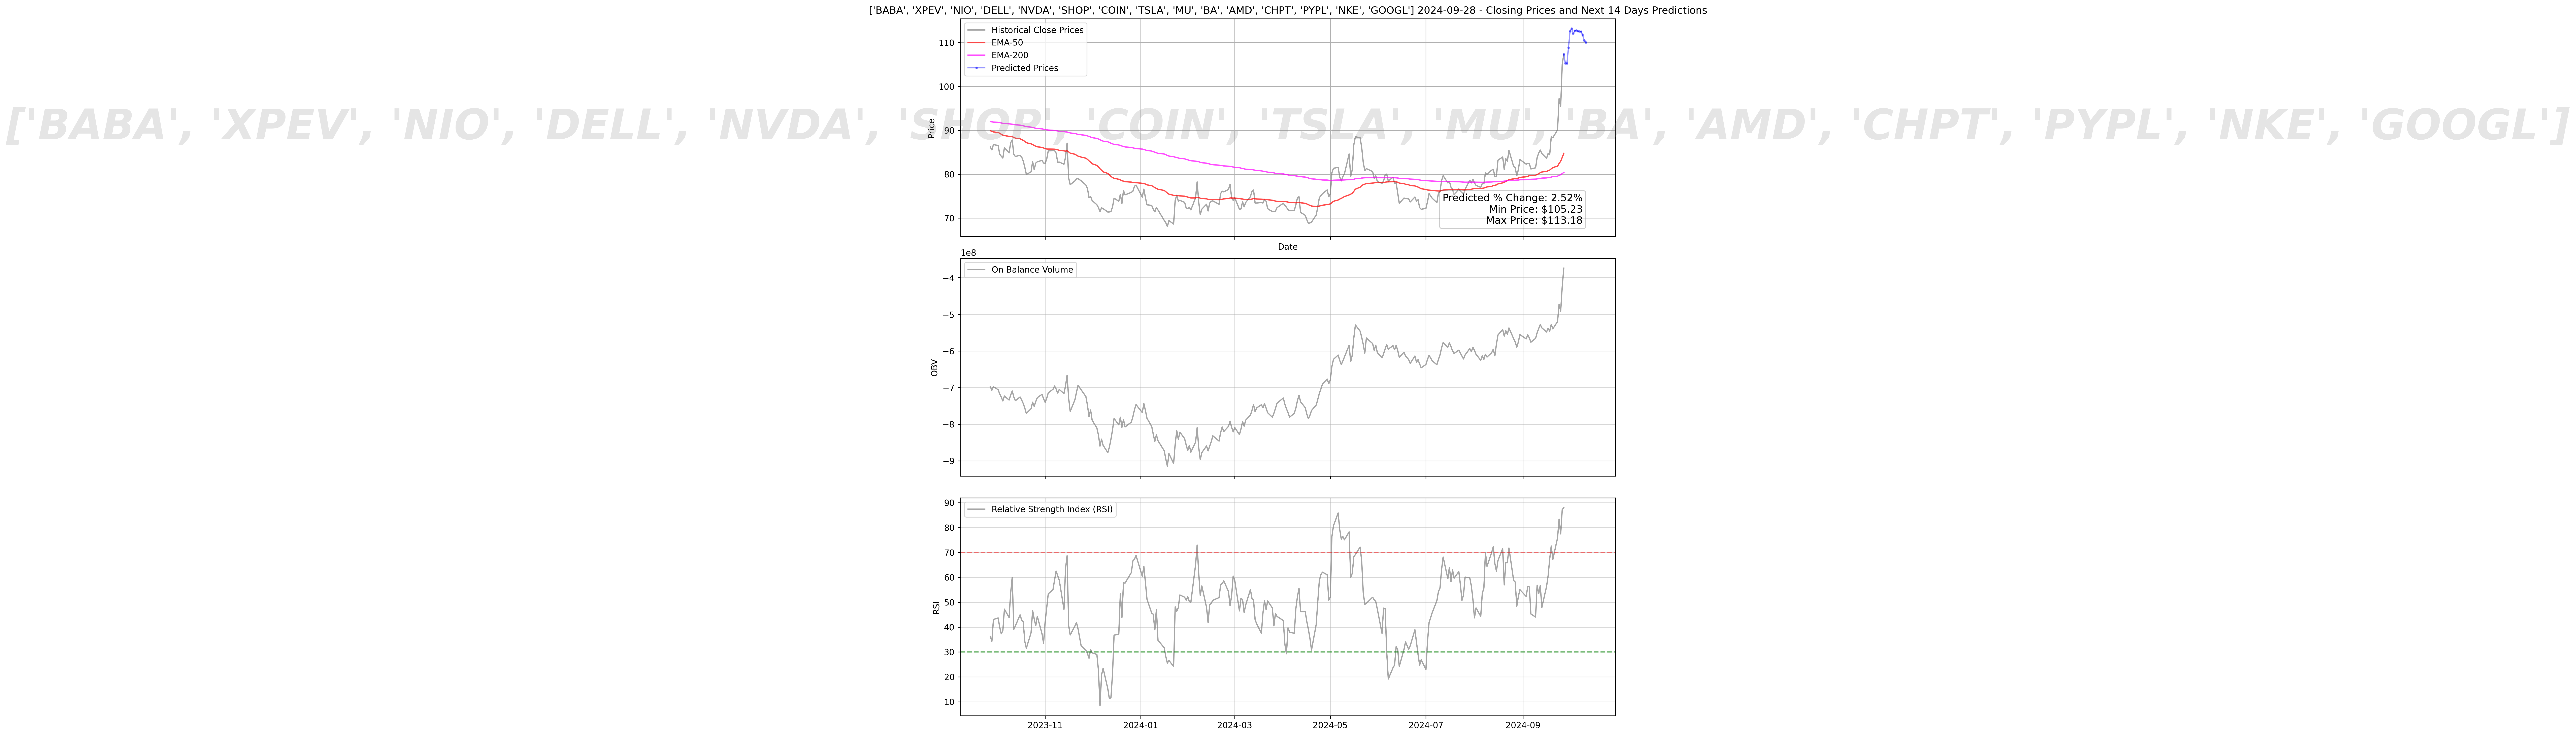

[*********************100%%**********************]  1 of 1 completed


XPEV ...working on
Root Mean Squared Error: 0.769
R^2 Score: 0.996
Current price of XPEV: 12.72
XPEV is predicted as a ----  HODL / SIDELINES


C:\Users\Farrukh\jupyter-Notebooks\STOCKS\plotstock.py:161: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


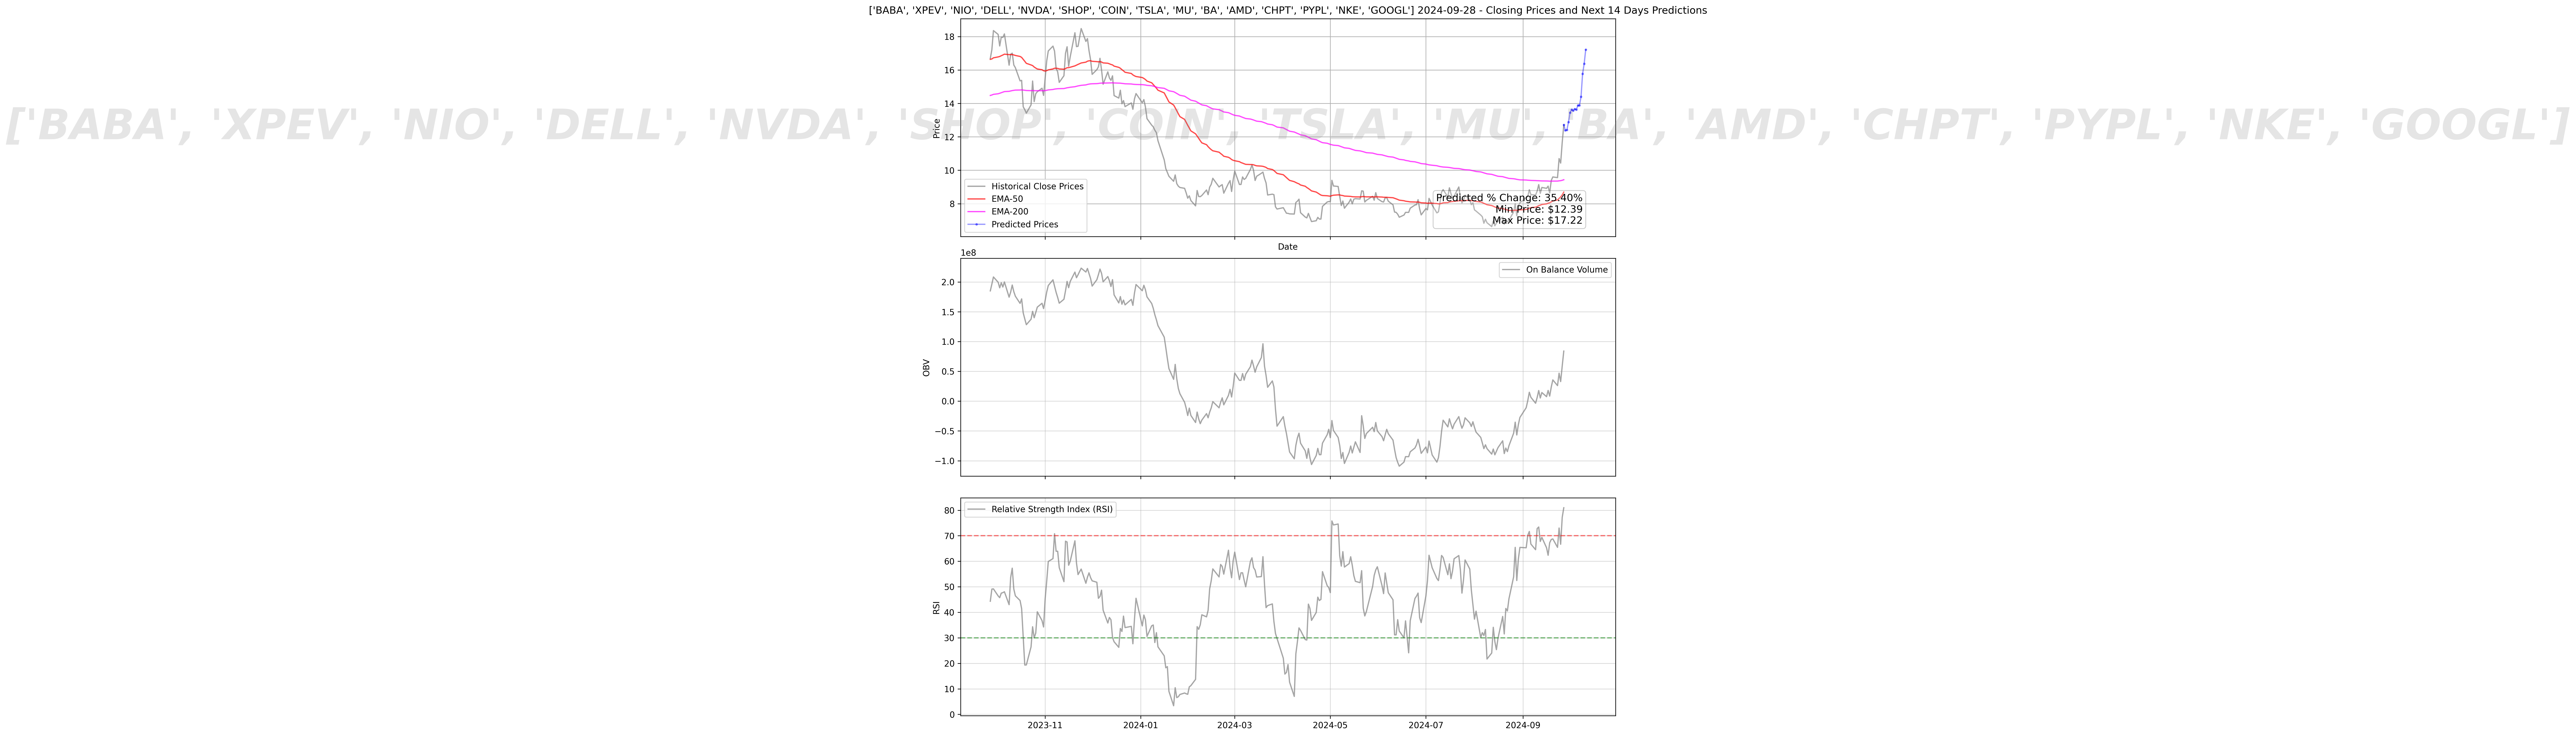

[*********************100%%**********************]  1 of 1 completed


NIO ...working on
Root Mean Squared Error: 0.9
R^2 Score: 0.996
Current price of NIO: 6.52
NIO is predicted as a ----  BUY


C:\Users\Farrukh\jupyter-Notebooks\STOCKS\plotstock.py:161: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


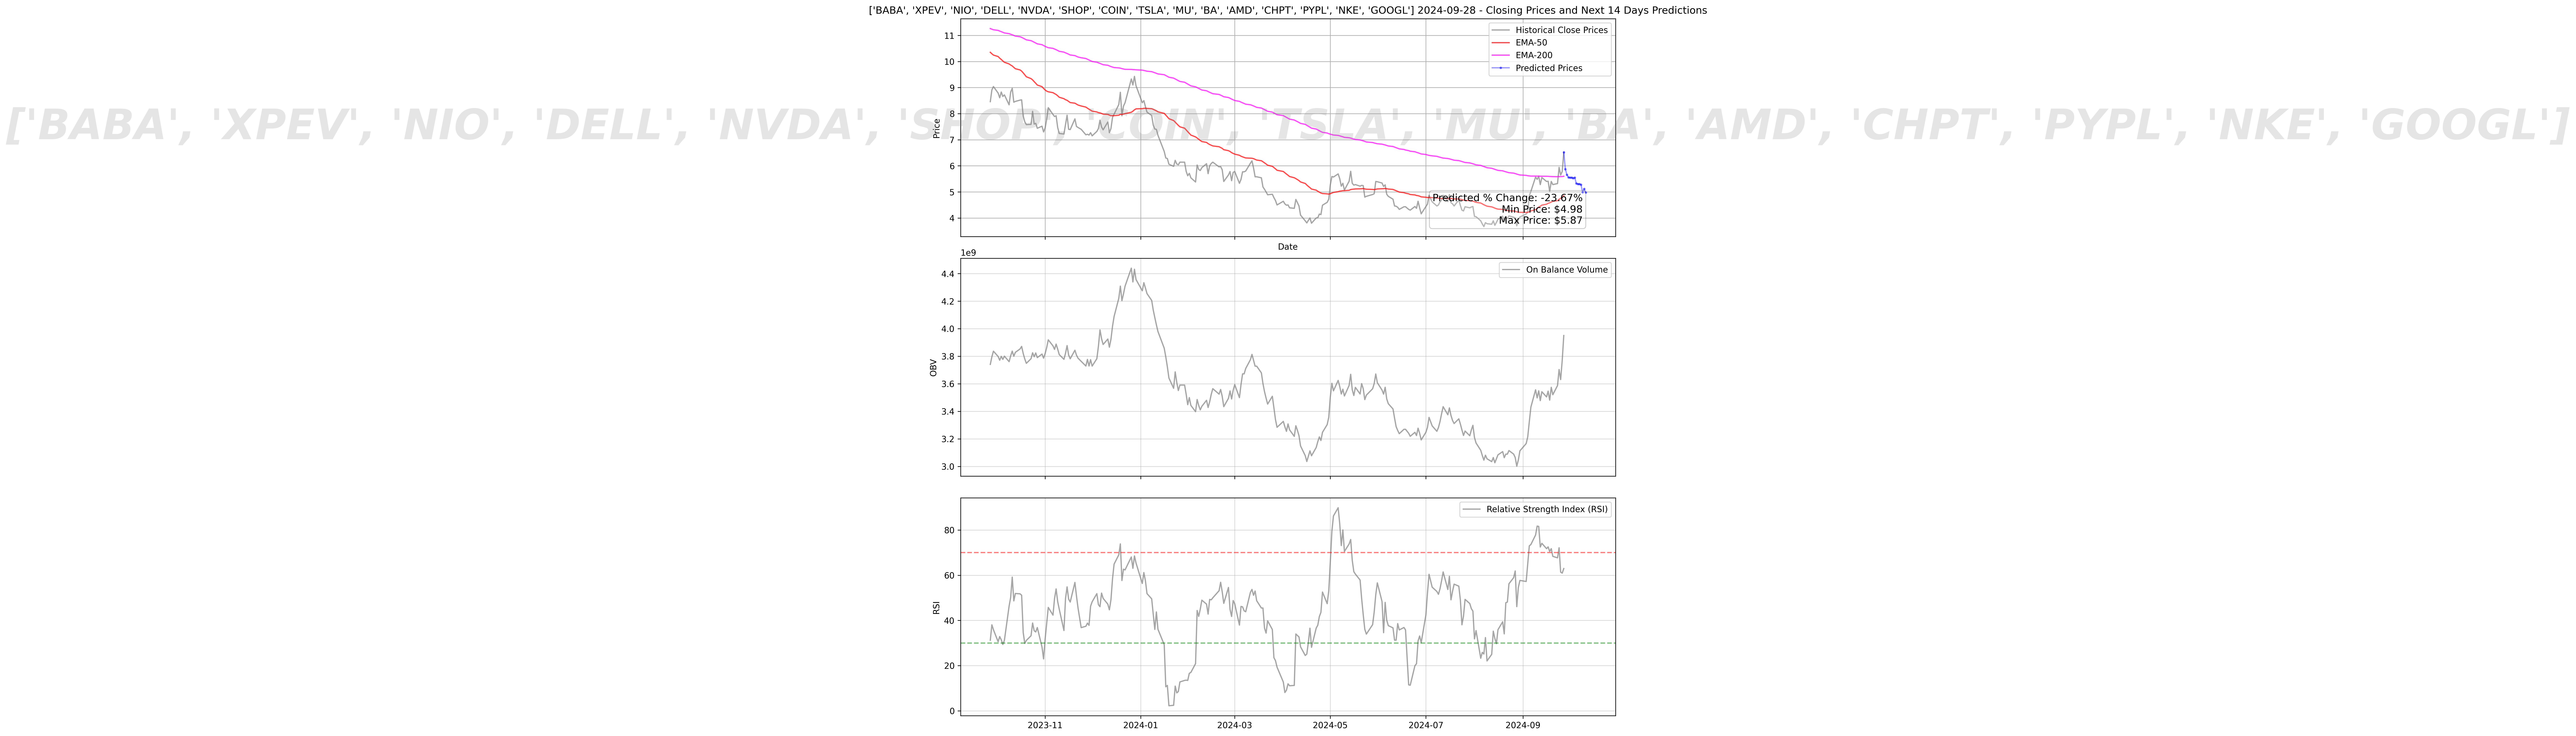

[*********************100%%**********************]  1 of 1 completed


DELL ...working on
Root Mean Squared Error: 1.636
R^2 Score: 0.997
Current price of DELL: 120.22


In [ ]:
for stock in tickers:
    current_date = datetime.datetime.now().strftime('%Y-%m-%d')
    stock_df = ta.get_stock_data(ticker, start_date, current_date)
    stock_df = ta.add_technical_indicators(stock_df) 
    stock_df = ta.add_candlestickpatterns(stock_df)
    X, y, scaler = ta.prepare_ml_data(stock_df)

    print(f'{stock}', "...working on")
    X_train, X_test, y_train, y_test = ta.train_test_split(X, y, test_size=0.35, random_state=500)
    model = ta.train_model(X_train, y_train, nest=1000, md=6)
    
    ta.evaluate_model(model, X_test, y_test)
    current_price = round(stock_df['Close'].iloc[-1], 2)  # Most recent closing price
    print(f'Current price of {stock}:' , current_price)

    # Make predictions
    predicted_prices = ta.predict_prices(model, stock_df, scaler, num_days=ndays, window_size=500)
    
    signal = ta.generate_signal(predicted_prices, current_price, stock_df)
    print(stock + " is predicted as a ---- ", signal)

    # PLOT PREDICTION
    ps.plot_with_predictions(stock_df, predicted_prices, ticker = stock, num_days=ndays)